### Création du point d’entrée sur le serveur de calcul

In [1]:
from pyspark.sql import SparkSession
spark  = SparkSession.builder.master("local[4]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/02 19:16:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Création des différents schémas

Pas forcement utile dans notre cas étant donné que les datasets ne sont pas très grands.

L'utilisation de `inferSchema=true` aurait suffit mais risque de prends plus de temps et n'est pas forcément fiable

In [3]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType

schema_caracteristiques = StructType([
    StructField("Num_Acc", LongType()),
    StructField("an", IntegerType()),
    StructField("mois", IntegerType()),
    StructField("jour", IntegerType()),
    StructField("hrmn", IntegerType()),
    StructField("lum", IntegerType()),
    StructField("agg", IntegerType()),
    StructField("int", IntegerType()),
    StructField("atm", IntegerType()),
    StructField("col", IntegerType()),
    StructField("com", IntegerType()),
    StructField("gps", StringType()),
    StructField("lat", IntegerType()),
    StructField("long", IntegerType()),
    StructField("dep", IntegerType()),
])

schema_vehicules = StructType([
    StructField("Num_Acc", LongType()),
    StructField("senc", IntegerType()),
    StructField("catv", IntegerType()),
    StructField("occutc", IntegerType()),
    StructField("obs", IntegerType()),
    StructField("obsm", IntegerType()),
    StructField("choc", IntegerType()),
    StructField("manv", IntegerType()),
    StructField("num_veh", StringType()),
])

schema_usagers = StructType([
    StructField("Num_Acc", LongType()),
    StructField("place", IntegerType()),
    StructField("catu", IntegerType()),
    StructField("grav", IntegerType()),
    StructField("sexe", IntegerType()),
    StructField("trajet", IntegerType()),
    StructField("secu", StringType()),
    StructField("locp", IntegerType()),
    StructField("actp", IntegerType()),
    StructField("etatp", IntegerType()),
    StructField("an_nais", IntegerType()),
    StructField("num_veh", StringType()),
])

schema_lieux = StructType([
    StructField("Num_Acc", LongType()),
    StructField("catr", IntegerType()),
    StructField("voie", StringType()),
    StructField("v1", IntegerType()),
    StructField("v2", StringType()),
    StructField("circ", IntegerType()),
    StructField("nbv", IntegerType()),
    StructField("pr", IntegerType()),
    StructField("pr1", IntegerType()),
    StructField("vosp", IntegerType()),
    StructField("prof", IntegerType()),
    StructField("plan", IntegerType()),
    StructField("lartpc", IntegerType()),
    StructField("larrout", IntegerType()),
    StructField("surf", IntegerType()),
    StructField("infra", IntegerType()),
    StructField("situ", IntegerType()),
    StructField("env1", IntegerType()),
])

### Création des dataframes

In [4]:
# On supprime la colonne adr contenant des chaînes de caractères avec un encodage pouvant poser problème
caracteristiques = spark.read.options(header=True, delimiter=",").schema(schema_caracteristiques).csv("./accidents/caracteristiques*.csv")

vehicules = spark.read.options(header=True, delimiter=",").schema(schema_vehicules).csv("./accidents/vehicules*.csv")

usagers = spark.read.options(header=True, delimiter=",").schema(schema_usagers).csv("./accidents/usagers*.csv")

lieux = spark.read.options(header=True, delimiter=",").schema(schema_lieux).csv("./accidents/lieux*.csv")

### Transformation des dataframes en rdd

In [5]:
caracteristiques_rdd = caracteristiques.rdd
vehicules_rdd = vehicules.rdd
usagers_rdd = usagers.rdd
lieux_rdd = lieux.rdd

### Affichages des tableaux

#### Caractéristiques

In [6]:
caracteristiques.show(truncate=False, n=5)
print(f"shape: {caracteristiques.count()} x {len(caracteristiques.columns)}")

+------------+---+----+----+----+---+---+---+---+---+-----+---+----+----+---+
|Num_Acc     |an |mois|jour|hrmn|lum|agg|int|atm|col|com  |gps|lat |long|dep|
+------------+---+----+----+----+---+---+---+---+---+-----+---+----+----+---+
|202100000001|21 |11  |30  |null|2  |1  |1  |1  |1  |30319|M  |null|null|30 |
|202100000002|21 |9   |25  |null|1  |1  |3  |1  |3  |51544|M  |null|null|51 |
|202100000003|21 |7   |15  |null|1  |2  |1  |7  |6  |85048|M  |null|null|85 |
|202100000004|21 |3   |27  |null|5  |2  |2  |3  |6  |93005|M  |null|null|93 |
|202100000005|21 |2   |25  |null|5  |2  |1  |1  |2  |76429|M  |null|null|76 |
+------------+---+----+----+----+---+---+---+---+---+-----+---+----+----+---+
only showing top 5 rows

shape: 1034545 x 15


#### Véhicules

In [8]:
vehicules.show(truncate=False, n=5)
print(f"shape: {caracteristiques.count()} x {len(caracteristiques.columns)}")

+------------+----+----+------+----+----+----+----+-------+
|Num_Acc     |senc|catv|occutc|obs |obsm|choc|manv|num_veh|
+------------+----+----+------+----+----+----+----+-------+
|200900000001|0   |13  |0     |null|null|null|null|A01    |
|200900000002|0   |7   |0     |null|null|null|null|B02    |
|200900000002|0   |7   |0     |null|null|null|null|A01    |
|200900000003|0   |10  |0     |null|null|null|null|A01    |
|200900000003|0   |33  |0     |null|null|null|null|B02    |
+------------+----+----+------+----+----+----+----+-------+
only showing top 5 rows

shape: 1034545 x 15


#### Usagers

In [9]:
usagers.show(truncate=False, n=5)
print(f"shape: {usagers.count()} x {len(usagers.columns)}")

+------------+-----+----+----+----+------+----+----+----+-----+-------+-------+
|Num_Acc     |place|catu|grav|sexe|trajet|secu|locp|actp|etatp|an_nais|num_veh|
+------------+-----+----+----+----+------+----+----+----+-----+-------+-------+
|200900000001|null |3   |3   |1   |null  |null|null|null|null |null   |A01    |
|200900000001|null |1   |1   |2   |null  |11.0|null|null|null |null   |A01    |
|200900000002|null |1   |3   |1   |null  |11.0|null|null|null |null   |B02    |
|200900000002|null |1   |2   |1   |null  |11.0|null|null|null |null   |A01    |
|200900000003|null |1   |1   |1   |null  |11.0|null|null|null |null   |A01    |
+------------+-----+----+----+----+------+----+----+----+-----+-------+-------+
only showing top 5 rows

shape: 2312122 x 12


#### Lieux

In [11]:
lieux.show(truncate=False, n=5)
print(f"shape: {caracteristiques.count()} x {len(caracteristiques.columns)}")

+------------+----+-----+----+----+----+----+----+----+----+----+----+------+-------+----+-----+----+----+
|Num_Acc     |catr|voie |v1  |v2  |circ|nbv |pr  |pr1 |vosp|prof|plan|lartpc|larrout|surf|infra|situ|env1|
+------------+----+-----+----+----+----+----+----+----+----+----+----+------+-------+----+-----+----+----+
|200900000001|3   |125.0|null|null|null|null|null|null|null|null|null|null  |null   |null|null |null|null|
|200900000002|3   |878.0|null|null|null|null|null|null|null|null|null|null  |null   |null|null |null|null|
|200900000003|3   |4.0  |null|null|null|null|null|null|null|null|null|null  |null   |null|null |null|null|
|200900000004|3   |775.0|null|null|null|null|null|null|null|null|null|null  |null   |null|null |null|null|
|200900000005|3   |41.0 |null|null|null|null|null|null|null|null|null|null  |null   |null|null |null|null|
+------------+----+-----+----+----+----+----+----+----+----+----+----+------+-------+----+-----+----+----+
only showing top 5 rows

shape: 10345

## Des informations pertinentes ?

#### Répartition des accidents en et hors agglomération

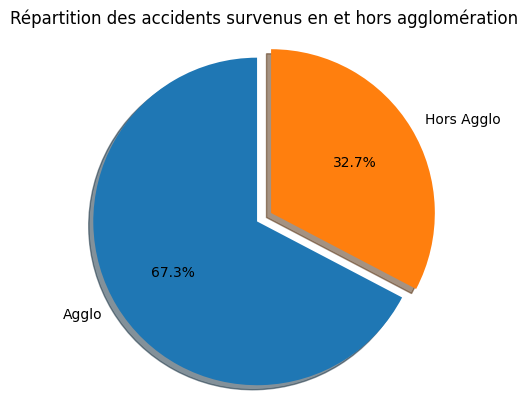

In [12]:
import matplotlib.pyplot as plt

k = caracteristiques_rdd.map(lambda x: ("Agglo" if x.agg-1 else "Hors Agglo", 1)).reduceByKey(lambda x, y: x + y).collect()

labels = [x[0] for x in k]
sizes = [x[1] for x in k]
explode = (0, 0.1)  # permet de faire ressortir la part "Autres"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents survenus en et hors agglomération")

plt.show()


On observe qu'une grande majorité d'accidents à lieu en agglomération

#### Comparons les taux de mortalité des accidents en et hors agglomération

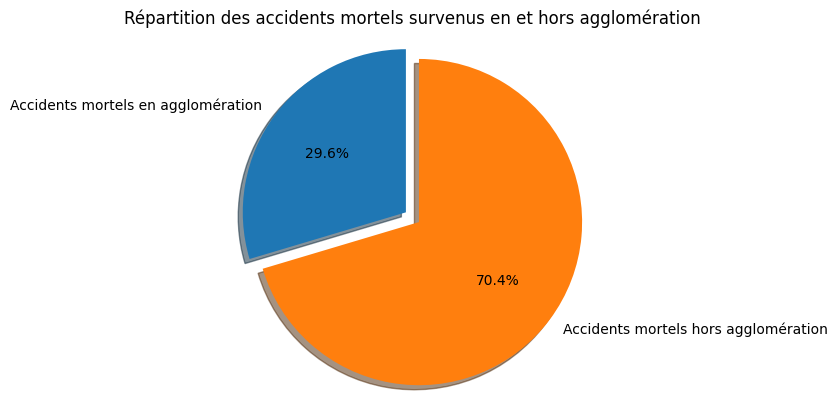

In [13]:
# comparaison des taux de mortalité entre les accidents survenus en agglomération et hors agglomération

# on ne garde que les accidents mortels
usagers_morts = usagers_rdd.filter(lambda x: x.grav == 2)

# accidents mortels en agglomération
usagers_morts_horsagglo = usagers_morts.join(caracteristiques_rdd.filter(lambda x: x.agg == 1))

# accidents mortels en agglomération
usagers_morts_agglo = usagers_morts.join(caracteristiques_rdd.filter(lambda x: x.agg == 2))


labels = "Accidents mortels en agglomération", "Accidents mortels hors agglomération"
sizes = usagers_morts_agglo.count(), usagers_morts_horsagglo.count()
explode = (0, 0.1)  # permet de faire ressortir la part 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents mortels survenus en et hors agglomération")

plt.show()

#### Nombre d'accidents par département trié dans l'ordre décroissant

In [14]:
# on veut afficher le top 5 des departements avec le plus d'accidents
# on commence par map pour avoir un tuple (dep, 1)
# puis reduceByKey pour compter le nombre d'accidents par departement
# ensuite sortBy pour trier les departements par ordre décroissant
# et enfin un take pour afficher les 5 premiers

caracteristiques_rdd.map(lambda x: (x.dep, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).take(5)

[(75, 107065), (13, 61996), (93, 45316), (92, 40764), (94, 39841)]

On observe que le top cinq représente essentiellement Paris, excepté pour Marseille qui se place en seconde position

[('Hors Paris', 801559), ('Paris', 232986)]


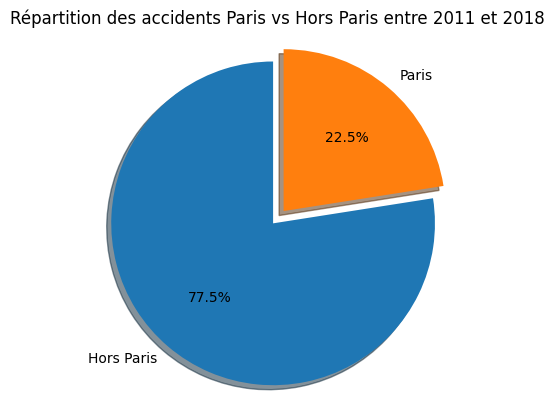

In [16]:
# on commence par map pour avoir un tuple (paris, 1) ou (hors paris, 1)
# puis reduceByKey pour compter le nombre d'accidents par departement
# enfin collect pour afficher les résultats

k = caracteristiques_rdd.map(lambda x: ("Paris" if x.dep in [75, 94, 92, 93] else "Hors Paris", 1)).reduceByKey(lambda x, y: x + y).collect()
print(k)

labels = [x[0] for x in k]
sizes = [x[1] for x in k]
explode = (0, 0.1)  # permet de faire ressortir la part "Autres"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents Paris vs Hors Paris entre 2011 et 2018")

plt.show()

On observe qu'environ 1 accidents sur 4 à lieu à Paris, verifions si c'est le cas tout les ans

Exception in thread "serve RDD 358" java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:708)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:752)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:675)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:641)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:617)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:574)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:532)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:64)


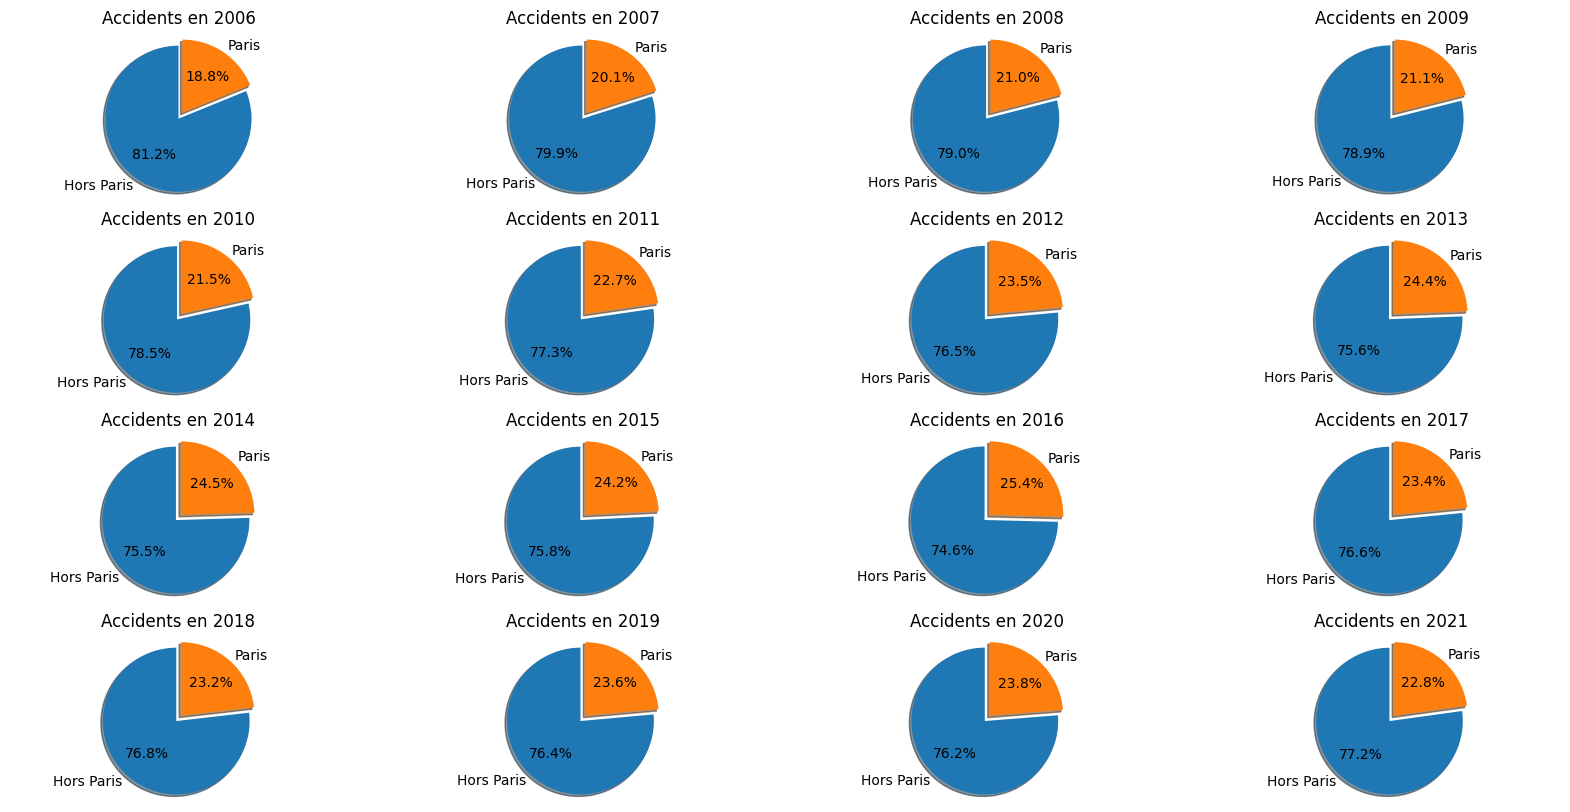

In [24]:
# create a subplot with 4 rows and 4 columns
fig, ax = plt.subplots(4, 4, figsize=(20, 10))

# on plot un camembert du nombre d'accidents à Paris et hors Paris pour chaque année entre 2006 et 2021
for i in range(6, 22):
    k = caracteristiques_rdd.filter(lambda x: x.an == i).map(lambda x: ("Paris" if x.dep in [75, 94, 92, 93] else "Hors Paris", 1)).reduceByKey(lambda x, y: x + y).collect()
    labels = [x[0] for x in k]
    sizes = [x[1] for x in k]
    explode = (0, 0.1)  # permet de faire ressortir la part "Autres"
    ax[int((i-6)/4)][(i-6)%4].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[int((i-6)/4)][(i-6)%4].axis('equal')
    ax[int((i-6)/4)][(i-6)%4].set_title(f"Accidents en {i+2000}")


les fichier geojson ont été récupéré sur https://github.com/gregoiredavid/france-geojson

In [25]:
import geopandas as gpd
sf = gpd.read_file('geojson/departements.geojson')

Text(5.35, 43.3, 'Bouches du Rhone')

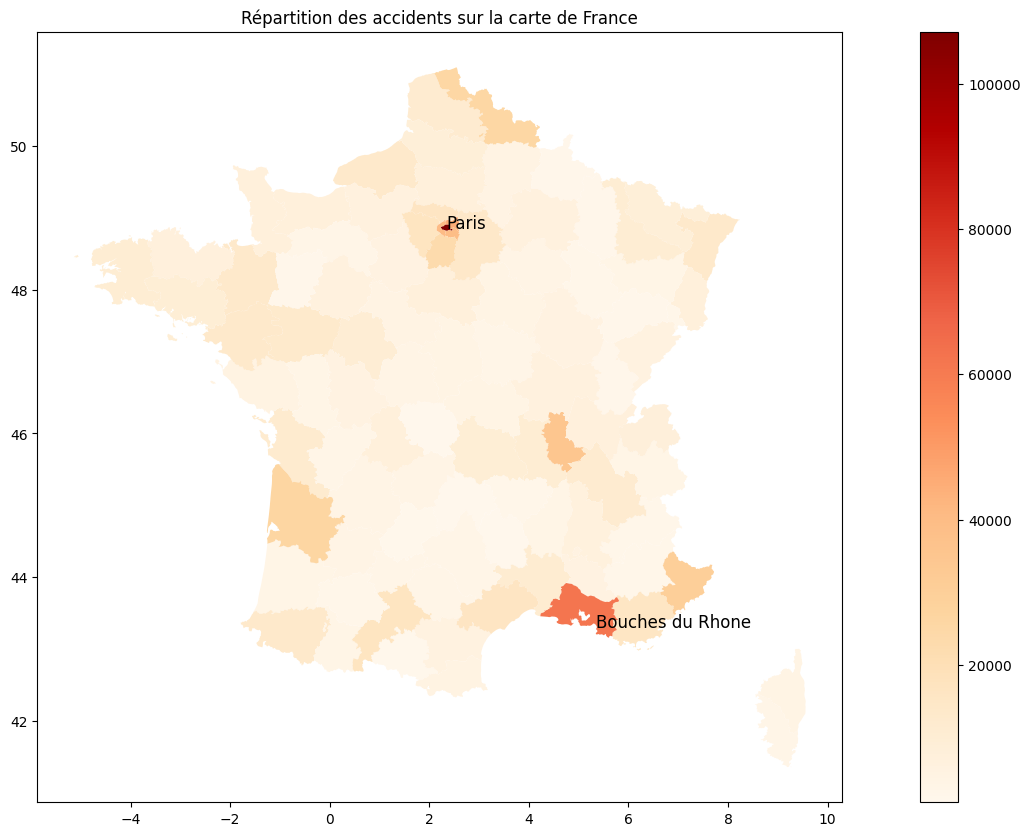

In [26]:
# on va maintenant afficher la répartition des accidents sur la carte de France
# on commence par créer un dictionnaire qui associe à chaque département le nombre d'accidents
# puis on crée une nouvelle colonne dans le dataframe sf qui contient le nombre d'accidents pour chaque département
# enfin on affiche la carte

#remove tout les accidents qui ne sont pas en France
k = caracteristiques_rdd.filter(lambda x: x.gps == "M")

accidents_par_dep = k.map(lambda x: ("2A" if x.dep == 201 else "2B" if x.dep == 202 else x.dep, 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()

sf['nb_accidents'] = sf['code'].map(accidents_par_dep)
ax = sf.plot(column='nb_accidents', legend=True, figsize=(20, 10), cmap='OrRd', missing_kwds={'color': 'grey', "hatch": "///"})
ax.set_title("Répartition des accidents sur la carte de France")
# annote paris  bouche du rhone
ax.annotate('Paris', xy=(2.35, 48.85), xytext=(2.35, 48.85), color='black', fontsize=12)
ax.annotate('Bouches du Rhone', xy=(5.35, 43.3), xytext=(5.35, 43.3), color='black', fontsize=12)

,code,nom,geometry,nb_morts,nm_implique,nb_morts_normalise
38,81,Tarn,"POLYGON ((1.99017 44.14945, 2.02477 44.15513, ...",543,6416,0.084632
6,39,Jura,"POLYGON ((5.51854 47.30418, 5.52327 47.30548, ...",404,4862,0.083093
86,70,Haute-Saône,"POLYGON ((5.88472 47.92605, 5.89671 47.93203, ...",346,4572,0.075678
81,46,Lot,"POLYGON ((1.44826 45.01931, 1.46198 45.01370, ...",260,3633,0.071566
92,53,Mayenne,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828...",347,4856,0.071458
41,85,Vendée,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",814,12228,0.066569
7,40,Landes,"POLYGON ((-1.25389 44.46760, -1.19248 44.48121...",550,8294,0.066313
39,82,Tarn-et-Garonne,"POLYGON ((1.06408 44.37851, 1.08240 44.38141, ...",440,6671,0.065957
27,24,Dordogne,"POLYGON ((0.62974 45.71457, 0.64015 45.69790, ...",603,9174,0.065729
12,61,Orne,"POLYGON ((-0.84094 48.75222, -0.81864 48.75480...",438,6717,0.065208


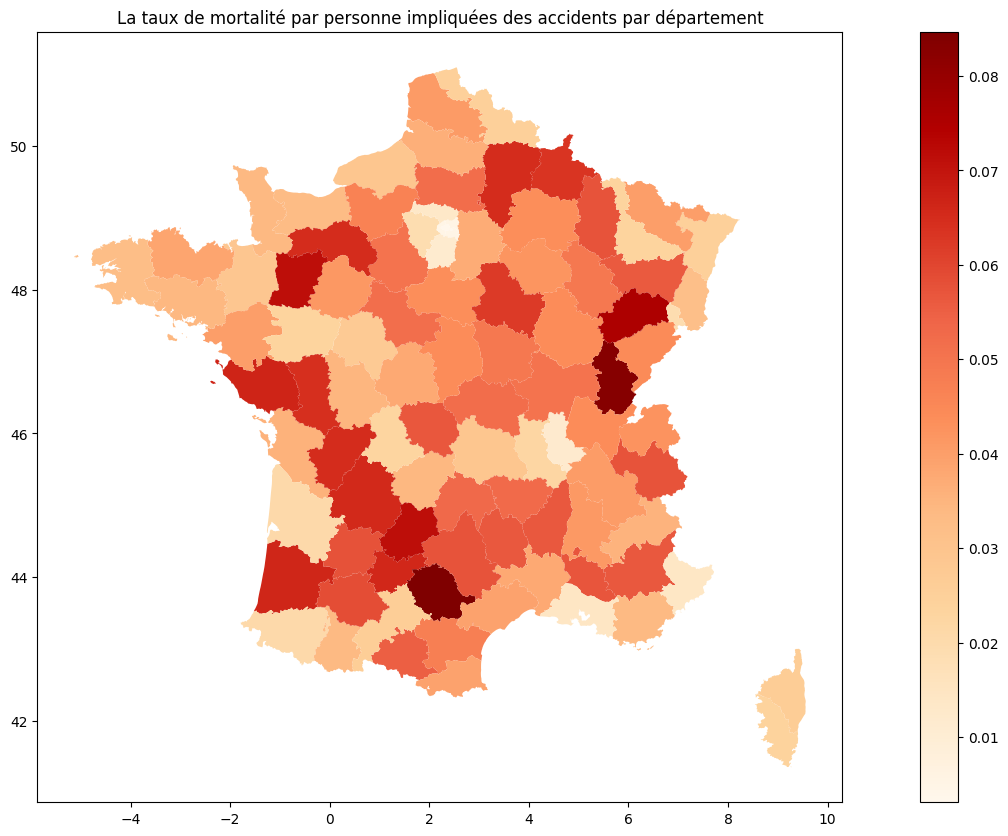

In [27]:
# on va maintenant afficher la répartition normalisé des accidents mortels sur la carte de France afin de visualisé les departements les plus dangereux
# on commence par créer un dictionnaire qui associe à chaque département le nombre d'accidents mortels
# puis on crée une nouvelle colonne dans le dataframe sf qui contient le nombre d'accidents mortels pour chaque département
# enfin on affiche la carte

sf = gpd.read_file('geojson/departements.geojson')

# filter usagers df to keep only dead people
usagers_mort = usagers.filter(usagers.grav == 2)

usagers_implique = usagers.join(caracteristiques.filter(caracteristiques.gps == "M"), usagers.Num_Acc == caracteristiques.Num_Acc, 'inner').rdd

usagers_mort_carac = usagers_mort.join(caracteristiques.filter(caracteristiques.gps == "M"), usagers_mort.Num_Acc == caracteristiques.Num_Acc, 'inner').rdd

mort_par_dep = usagers_mort_carac.map(lambda x: ("2A" if x.dep == 201 else "2B" if x.dep == 202 else x.dep, 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()
implique_par_dep = usagers_implique.map(lambda x: ("2A" if x.dep == 201 else "2B" if x.dep == 202 else x.dep, 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()


sf['nb_morts'] = sf['code'].map(mort_par_dep)
sf['nm_implique'] = sf['code'].map(implique_par_dep)

sf['nb_morts_normalise'] = sf['nb_morts']/sf['nm_implique']

ax = sf.plot(column='nb_morts_normalise', legend=True, figsize=(20, 10), cmap='OrRd', missing_kwds={'color': 'grey', "hatch": "///"})
ax.set_title("La taux de mortalité par personne impliquées des accidents par département")

#sort sf by nb_morts_normalise
sf = sf.sort_values(by=['nb_morts_normalise'], ascending=False)
sf.head(10)

,code,nom,geometry,nb_morts,nm_implique,nb_morts_normalise
67,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.36395 48.81631, ...",40824,88527,0.461147
44,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.32697 48.94536, ...",39878,87010,0.458315
19,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.56579 49.01240, ...",46395,101516,0.457022
54,33,Gironde,"POLYGON ((-1.02574 45.57469, -0.92654 45.49613...",27594,62323,0.442758
34,69,Rhône,"POLYGON ((4.38807 46.21979, 4.38829 46.24796, ...",35117,80875,0.434213
36,75,Paris,"POLYGON ((2.31989 48.90046, 2.38515 48.90201, ...",93678,216706,0.432282
89,91,Essonne,"POLYGON ((2.22655 48.77610, 2.23297 48.76619, ...",22131,51806,0.427190
46,06,Alpes-Maritimes,"MULTIPOLYGON (((7.06712 43.51365, 7.03613 43.5...",28554,66884,0.426918
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",1384,3270,0.423242
37,78,Yvelines,"POLYGON ((2.20059 48.90868, 2.17652 48.90035, ...",16522,39047,0.423131


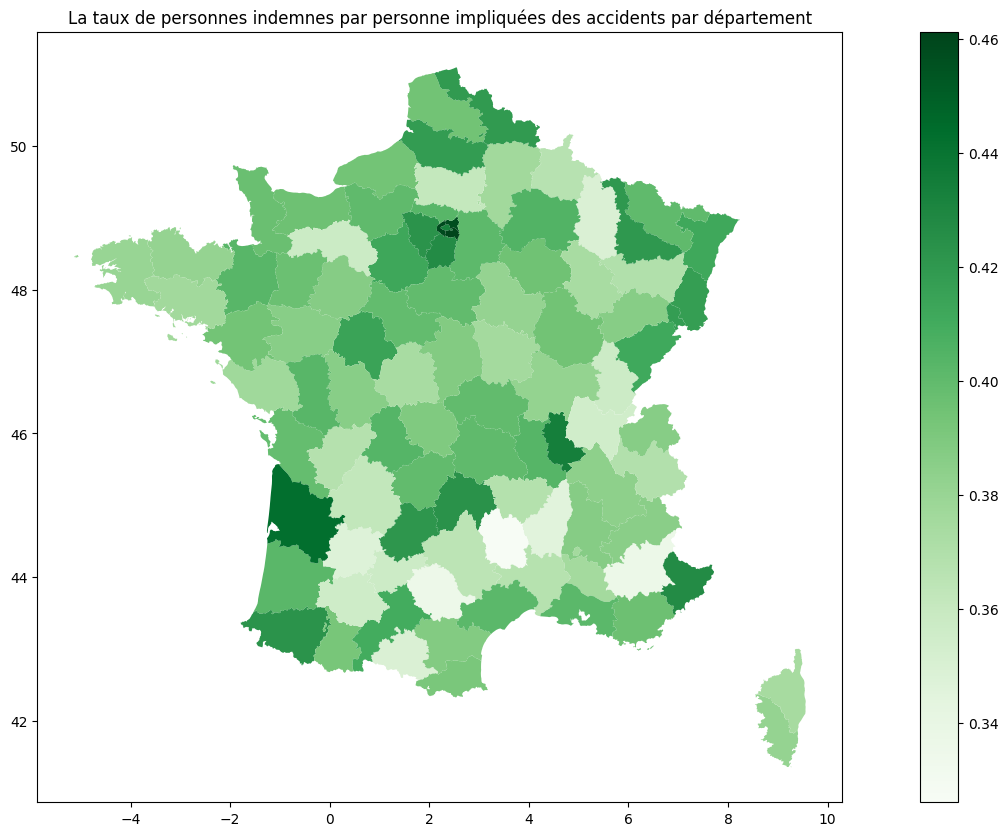

In [29]:
# on va maintenant afficher la répartition normalisé des accidents mortels sur la carte de France afin de visualisé les departements les plus dangereux
# on commence par créer un dictionnaire qui associe à chaque département le nombre d'accidents mortels
# puis on crée une nouvelle colonne dans le dataframe sf qui contient le nombre d'accidents mortels pour chaque département
# enfin on affiche la carte

sf = gpd.read_file('geojson/departements.geojson')

# filter usagers df to keep only dead people
usagers_mort = usagers.filter(usagers.grav == 1)

usagers_implique = usagers.join(caracteristiques.filter(caracteristiques.gps == "M"), usagers.Num_Acc == caracteristiques.Num_Acc, 'inner').rdd

usagers_mort_carac = usagers_mort.join(caracteristiques.filter(caracteristiques.gps == "M"), usagers_mort.Num_Acc == caracteristiques.Num_Acc, 'inner').rdd

mort_par_dep = usagers_mort_carac.map(lambda x: ("2A" if x.dep == 201 else "2B" if x.dep == 202 else x.dep, 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()
implique_par_dep = usagers_implique.map(lambda x: ("2A" if x.dep == 201 else "2B" if x.dep == 202 else x.dep, 1)).reduceByKey(lambda x, y: x + y).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()


sf['nb_morts'] = sf['code'].map(mort_par_dep)
sf['nm_implique'] = sf['code'].map(implique_par_dep)

sf['nb_morts_normalise'] = sf['nb_morts']/sf['nm_implique']

ax = sf.plot(column='nb_morts_normalise', legend=True, figsize=(20, 10), cmap='Greens', missing_kwds={'color': 'grey', "hatch": "///"})
ax.set_title("La taux de personnes indemnes par personne impliquées des accidents par département")

#sort sf by nb_morts_normalise
sf = sf.sort_values(by=['nb_morts_normalise'], ascending=False)
sf.head(10)

#### Affichons le nombre d'accidents ayant eu lieu au Rond-Point des Champs-Élysées entre 2011 et 2018

In [30]:
lat_min, lat_max, long_min, long_max  = 4886809, 4886971, 230856, 231103
rond_point_marceldassault = caracteristiques_rdd.filter(lambda x: x.lat != None and x.long != None).filter(lambda x: lat_min <= x.lat <= lat_max and long_min <= x.long <= long_max).count() #175k accidents sans coordonnées GPS

lat_min, lat_max, long_min, long_max  = 4887284, 4887300, 229537, 229819
rond_point_arctriomphe= caracteristiques_rdd.filter(lambda x: x.lat != None and x.long != None).filter(lambda x: lat_min <= x.lat <= lat_max and long_min <= x.long <= long_max).count() # 1 accident

print(f"Nombre d'accidents sur le rond point Marcel Dassault : {rond_point_marceldassault}")
print(f"Nombre d'accidents sur le rond point de l'Arc de Triomphe : {rond_point_arctriomphe}")

Nombre d'accidents sur le rond point Marcel Dassault : 0
Nombre d'accidents sur le rond point de l'Arc de Triomphe : 0


#### Nombre d'accidents par type d'intersection

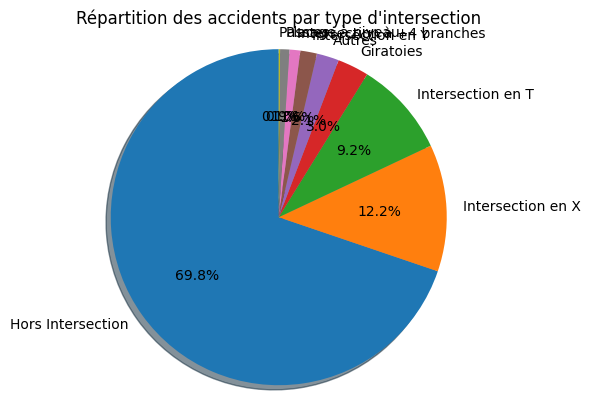

In [31]:
mapping = {1: "Hors Intersection", 2: "Intersection en X", 3: "Intersection en T", 4: "Intersection en Y", 5: "Intersection à +4 branches", 6: "Giratoies", 7: "Places", 8: "Passage à niveau", 9: "Autres"}
k = caracteristiques_rdd.map(lambda x: (mapping.get(x.int, "Autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()
labels = [x[0] for x in k]
sizes = [x[1] for x in k]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents par type d'intersection")

plt.show()

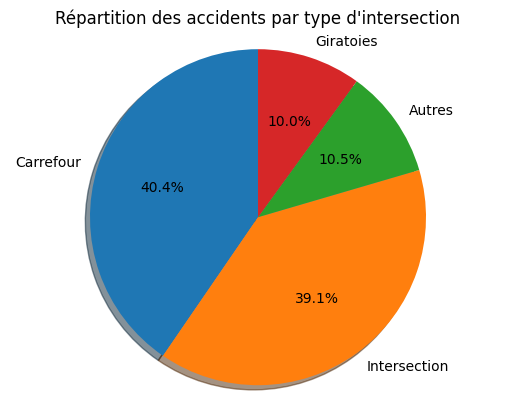

In [32]:
# on va maintenant rassembler les types d'intersection en 3 catégories : Intersection, Giratoire et Autres
# on commence par créer un dictionnaire pour faire le mapping
# puis on map pour remplacer les types d'intersection par les catégories
# ensuite on fait un reduceByKey pour compter le nombre d'accidents par catégorie

mapping = {2: "Carrefour", 3: "Intersection", 4: "Intersection", 5: "Intersection", 6: "Giratoies", 7: "Autres", 8: "Autres", 9: "Autres"}
k = caracteristiques_rdd.filter(lambda x: x.int != 1).map(lambda x: (mapping.get(x.int, "Autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()
labels = [x[0] for x in k]
sizes = [x[1] for x in k]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents par type d'intersection")

plt.show()

On observe qu'un accident sur deux intervient en rond-point ou en carrefour, surement dû à un refus de priorité

Text(4.5, 44.5, 'Ardèche')

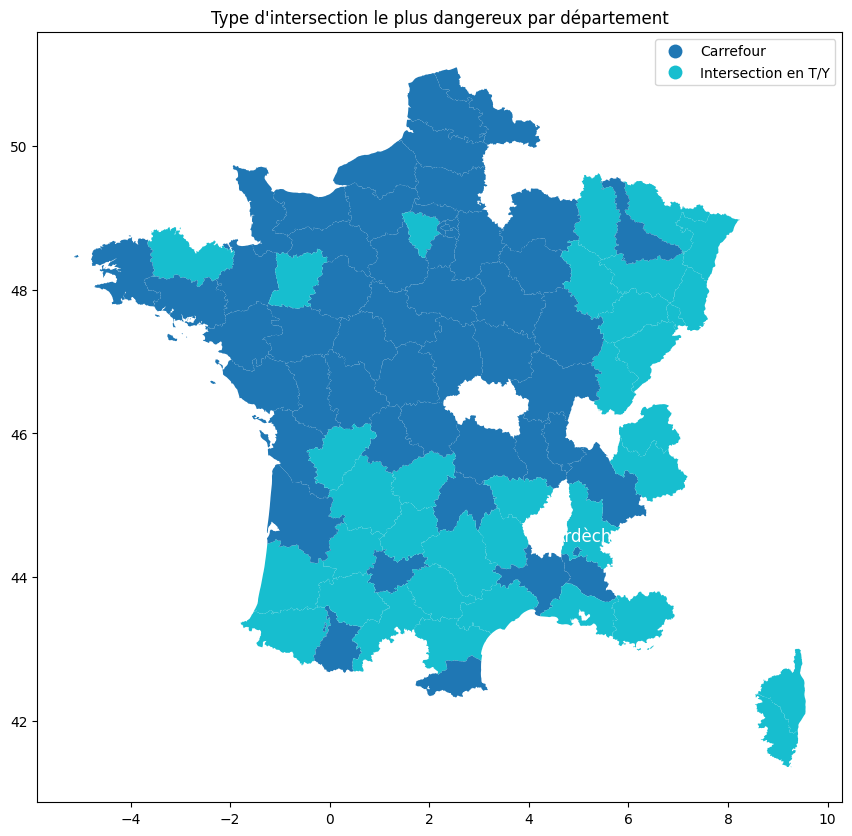

In [34]:
sf = gpd.read_file('geojson/departements.geojson')

# on veut montrer le type d'intersection avec le plus d'accidents par département

# on commence par créer un dictionnaire pour faire le mapping
# puis on map pour remplacer les types d'intersection par les catégories
# ensuite on fait un reduceByKey pour compter le nombre d'accidents par catégorie

mappings = {2: "Carrefour", 3: "Intersection en T/Y", 4: "Intersection en T/Y", 5: "Intersection à plus de 4 branches", 6: "Giratoies", 7: "Place", 8: "Passage à niveau", 9: "Autres"}
#k = caracteristiques_rdd.filter(lambda x: x.int != 1 and x.int != None).map(lambda x: (x.dep, mapping.get(x.int, "Autres"), 1))

k = caracteristiques.dropna(subset=['int', 'dep']).filter(caracteristiques.int != 1).filter(caracteristiques.gps == "M").toPandas()
k['int'] = k["int"].map(mappings)

# divse dep par 10 sauf pour 201 et 202 qu'on remplace par 2A et 2B
k['dep'] = k['dep'].apply(lambda x: "2A" if x == 201 else "2B" if x == 202 else str(x))
k = k.groupby(['dep', 'int']).size().reset_index(name='counts')

#for each dep, keep the intersection type with the most accidents
k = k.groupby('dep').apply(lambda x: x[x.counts == x.counts.max()]).reset_index(drop=True)
#k = k.groupby('dep').apply(lambda x: x[x.counts == x.counts.max()]).reset_index(drop=True).drop(columns=['counts'])

#merge with sf
sf = sf.merge(k, left_on='code', right_on='dep', how='left')

#plot
ax = sf.plot(column='int', figsize=(20, 10), legend=True)
ax.set_title("Type d'intersection le plus dangereux par département")

ax.annotate('Ardèche', xy=(4.5, 44.5), xytext=(4.5, 44.5), fontsize=12, color='white')


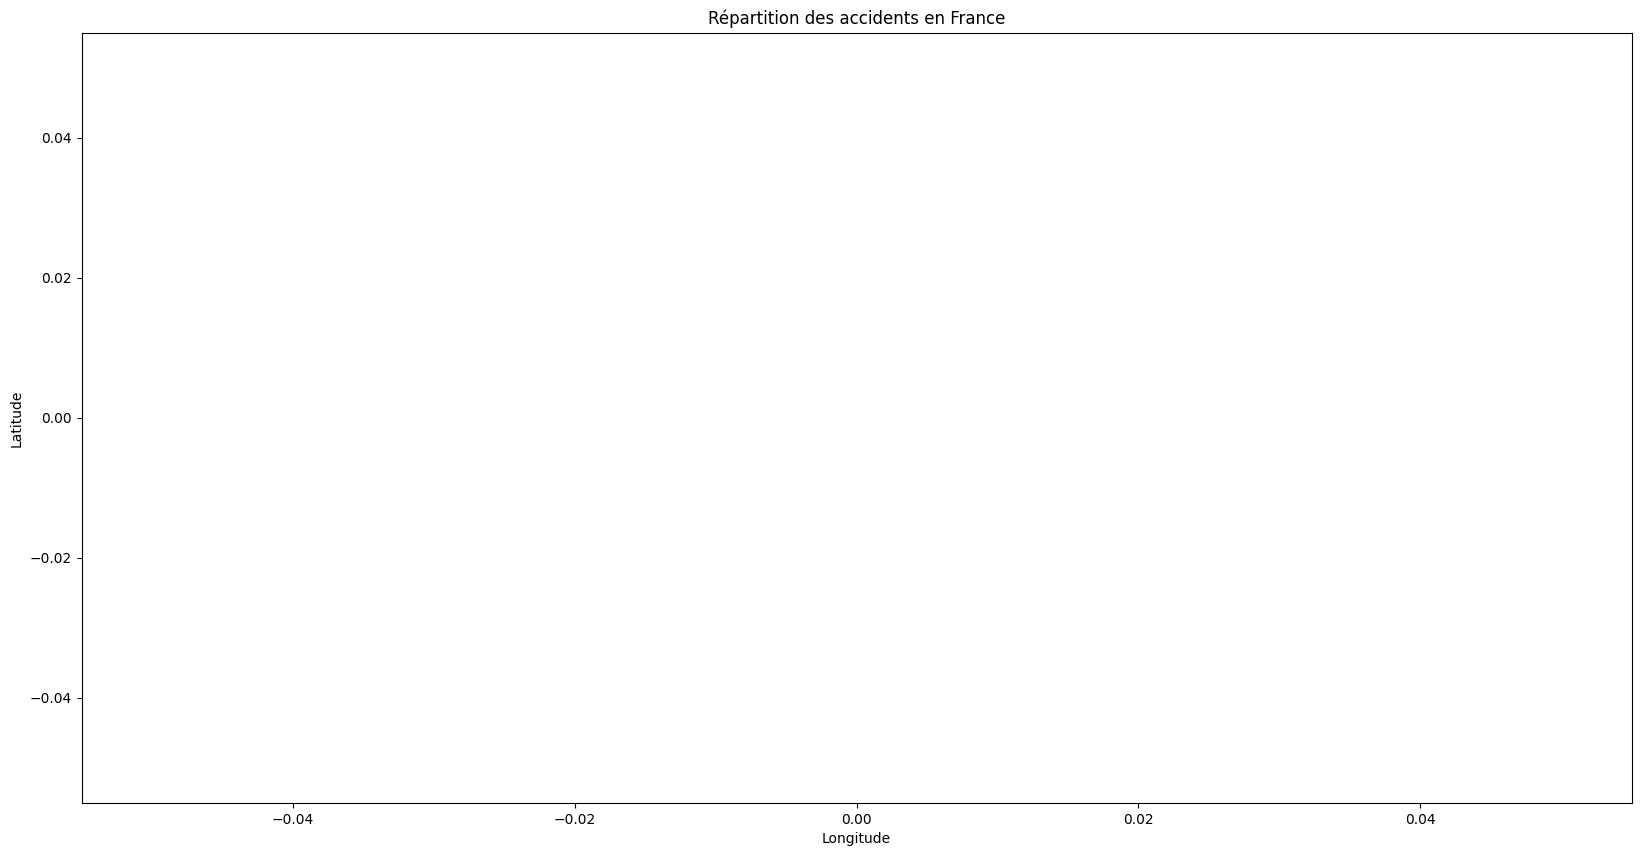

In [35]:
# scatter plot la longitude et la latitude

fig, ax = plt.subplots(figsize=(20, 10))
k = caracteristiques_rdd.filter(lambda x: x.long != None and x.long <= 1.5*10e5).filter(lambda x: x.lat != None and 3*10e5 <= x.lat <= 5.3*10e5)
ax.scatter(k.map(lambda x: x.long).collect(), k.map(lambda x: x.lat).collect(), s=0.1)
ax.set_title("Répartition des accidents en France")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

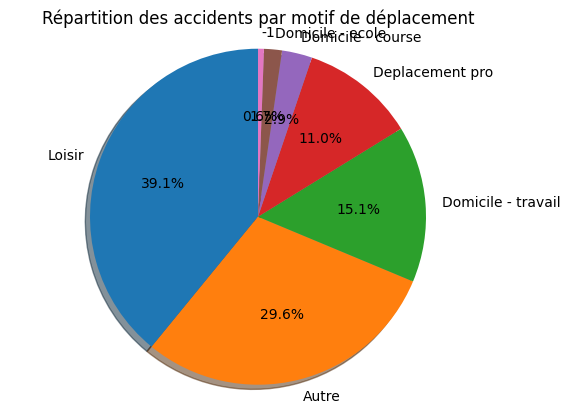

In [36]:
# nombre d'accident suivant le motif de deplacement
usagers_rdd_dropdup = usagers.dropDuplicates(["Num_Acc"]).rdd

mappings = {1: "Domicile - travail", 2: "Domicile - ecole", 3:"Domicile - course", 4:"Deplacement pro", 5:"Loisir", 9:"Autre", 0:"Autre"}


k = usagers_rdd_dropdup.filter(lambda x: x.trajet != None).map(lambda x: (mappings.get(x.trajet) or x.trajet, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).collect()

#plot a chart with the number of accident by type of movement
labels = [x[0] for x in k]
sizes = [x[1] for x in k]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.title.set_text("Répartition des accidents par motif de déplacement")
plt.show()


In [37]:
# nombre d'accident suivant le motif de deplacement
usagers_rdd_dropdup = usagers.dropDuplicates(["Num_Acc"]).rdd

# on ne garde que les trajet domicile - travail
k = usagers_rdd_dropdup.filter(lambda x: x.trajet != None and x.trajet == 1)

k = k.map(lambda x: (x.sexe, 1)).reduceByKey(lambda x, y: x + y).collect()
print(k)

[(1, 42923), (2, 18385)]


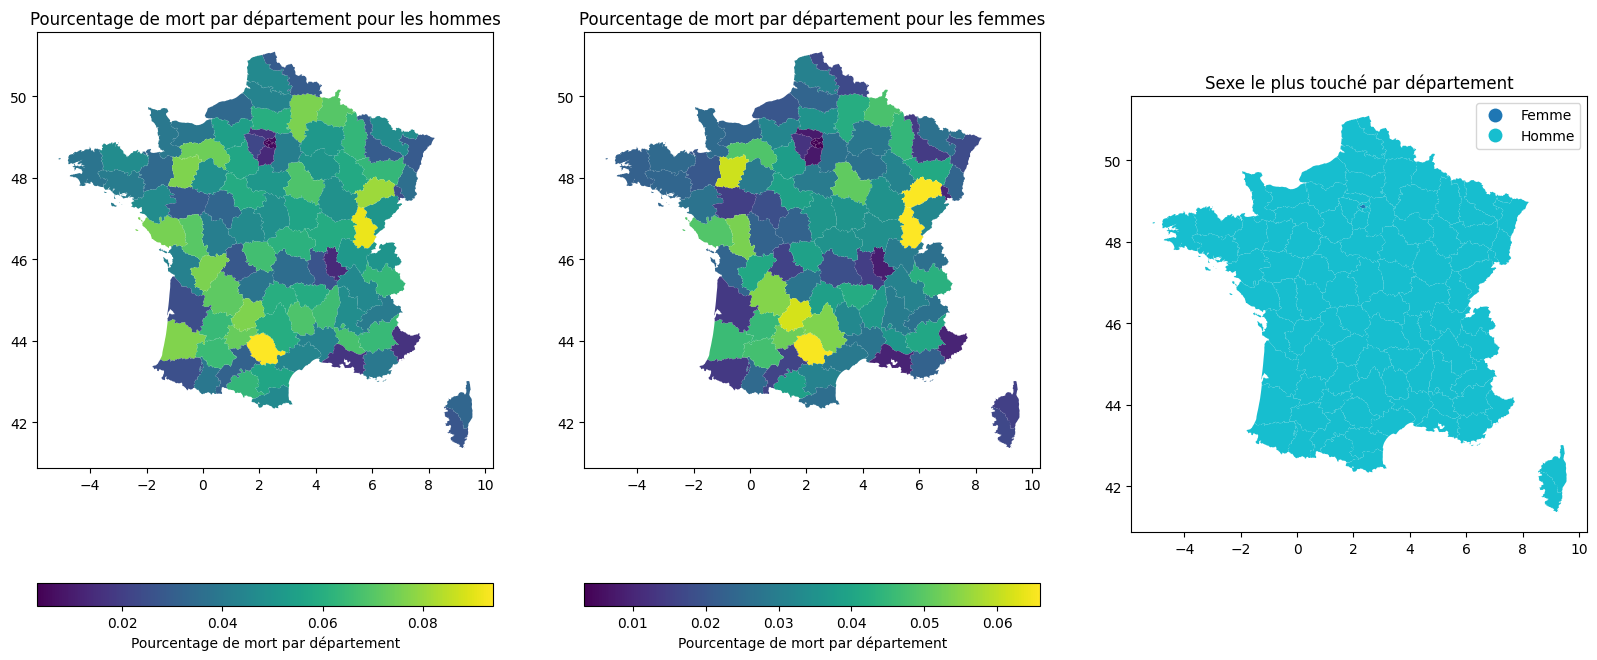

,code,nom,geometry,hommes_mort,femmes_mort,hommes_implique,femmes_implique,pourcentage_mort_homme,pourcentage_mort_femme,sexe_mort
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",530,138,6979,3260,0.075942,0.042331,Homme
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",293,86,5803,3210,0.050491,0.026791,Homme
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",437,141,11303,6046,0.038662,0.023321,Homme
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",131,42,2180,1090,0.060092,0.038532,Homme
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",468,160,8241,4219,0.056789,0.037924,Homme
5,35,Ille-et-Vilaine,"MULTIPOLYGON (((-2.00690 48.56611, -2.04621 48...",630,212,18378,10429,0.034280,0.020328,Homme
6,39,Jura,"POLYGON ((5.51854 47.30418, 5.52327 47.30548, ...",299,105,3269,1593,0.091465,0.065913,Homme
7,40,Landes,"POLYGON ((-1.25389 44.46760, -1.19248 44.48121...",421,129,5484,2808,0.076769,0.045940,Homme
8,42,Loire,"POLYGON ((3.89954 46.27591, 3.90551 46.27160, ...",403,127,15197,8614,0.026518,0.014743,Homme
9,45,Loiret,"POLYGON ((1.99409 48.28658, 2.00724 48.28469, ...",583,172,11389,5910,0.051190,0.029103,Homme


In [38]:
# affichons le sexe des victimes les plus touché par departement
sf = gpd.read_file('geojson/departements.geojson')


usagers_implique = usagers.join(caracteristiques.filter(caracteristiques.gps == "M"), usagers.Num_Acc == caracteristiques.Num_Acc, 'inner').rdd

# remplaçon les code pour les departements
#usagers_implique = usagers_implique.map(lambda x: ((str(x[0]).zfill(2) if x.dep != 201 and x.dep != 202 else x.dep, 1)))*
# lambda x: (("2A" is x.dep == 201 else "2B" if x.dep == 202 else str(x[0]).zfill(2), 1))

# compter le nombre de mort homme et femme par departement
k_hommes_mort = usagers_implique.filter(lambda x: x.sexe == 1).filter(lambda x: x.grav == 2).map(lambda x: (x.dep, 1)).reduceByKey(lambda x, y: x + y)
k_hommes_mort = k_hommes_mort.map(lambda x: ("2A" if x[0] == 201 else "2B" if x[0] == 202 else x[0], x[1])).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()

k_femmes_mort = usagers_implique.filter(lambda x: x.sexe == 2).filter(lambda x: x.grav == 2).map(lambda x: (x.dep, 1)).reduceByKey(lambda x, y: x + y)
k_femmes_mort =  k_femmes_mort.map(lambda x: ("2A" if x[0] == 201 else "2B" if x[0] == 202 else x[0], x[1])).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()

# compte le nombre de homme et femme par departement
k_hommes_impliquee = usagers_implique.filter(lambda x: x.sexe == 1).map(lambda x: (x.dep, 1)).reduceByKey(lambda x, y: x + y)
k_hommes_impliquee = k_hommes_impliquee.map(lambda x: ("2A" if x[0] == 201 else "2B" if x[0] == 202 else x[0], x[1])).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()

k_femmes_impliquee = usagers_implique.filter(lambda x: x.sexe == 2).map(lambda x: (x.dep, 1)).reduceByKey(lambda x, y: x + y)
k_femmes_impliquee =  k_femmes_impliquee.map(lambda x: ("2A" if x[0] == 201 else "2B" if x[0] == 202 else x[0], x[1])).map(lambda x: (str(x[0]).zfill(2) if isinstance(x[0], int) else x[0], x[1])).collectAsMap()

# on ajoute les données au geojson
sf['hommes_mort'] = sf['code'].map(k_hommes_mort)
sf['femmes_mort'] = sf['code'].map(k_femmes_mort)
sf['hommes_implique'] = sf['code'].map(k_hommes_impliquee)
sf['femmes_implique'] = sf['code'].map(k_femmes_impliquee)

# on calcule le pourcentage de mort par departement
sf['pourcentage_mort_homme'] = sf['hommes_mort'] / sf['hommes_implique']
sf['pourcentage_mort_femme'] = sf['femmes_mort'] / sf['femmes_implique']

# on affiche pour chaque departement le sexe le plus touché
sf['sexe_mort'] = sf.apply(lambda x: "Homme" if x['pourcentage_mort_homme'] > x['pourcentage_mort_femme'] else "Femme", axis=1)


# on plot 3 graphique, les departements ou les hommes sont les plus touchés, les departements ou les femmes sont les plus touchés et les departements les plus touché suivant le sexe
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# on plot les taux de mortalité hommes par departement
sf.plot(column='pourcentage_mort_homme', ax=ax[0], legend=True, legend_kwds={'label': "Pourcentage de mort par département", 'orientation': "horizontal"})
ax[0].set_title("Pourcentage de mort par département pour les hommes")

# on plot les taux de mortalité femmes par departement
sf.plot(column='pourcentage_mort_femme', ax=ax[1], legend=True, legend_kwds={'label': "Pourcentage de mort par département", 'orientation': "horizontal"})
ax[1].set_title("Pourcentage de mort par département pour les femmes")

# on plot le sexe le plus touché par departement
sf.plot(column='sexe_mort', ax=ax[2], legend=True)
ax[2].set_title("Sexe le plus touché par département")

plt.show()
sf.head(10)


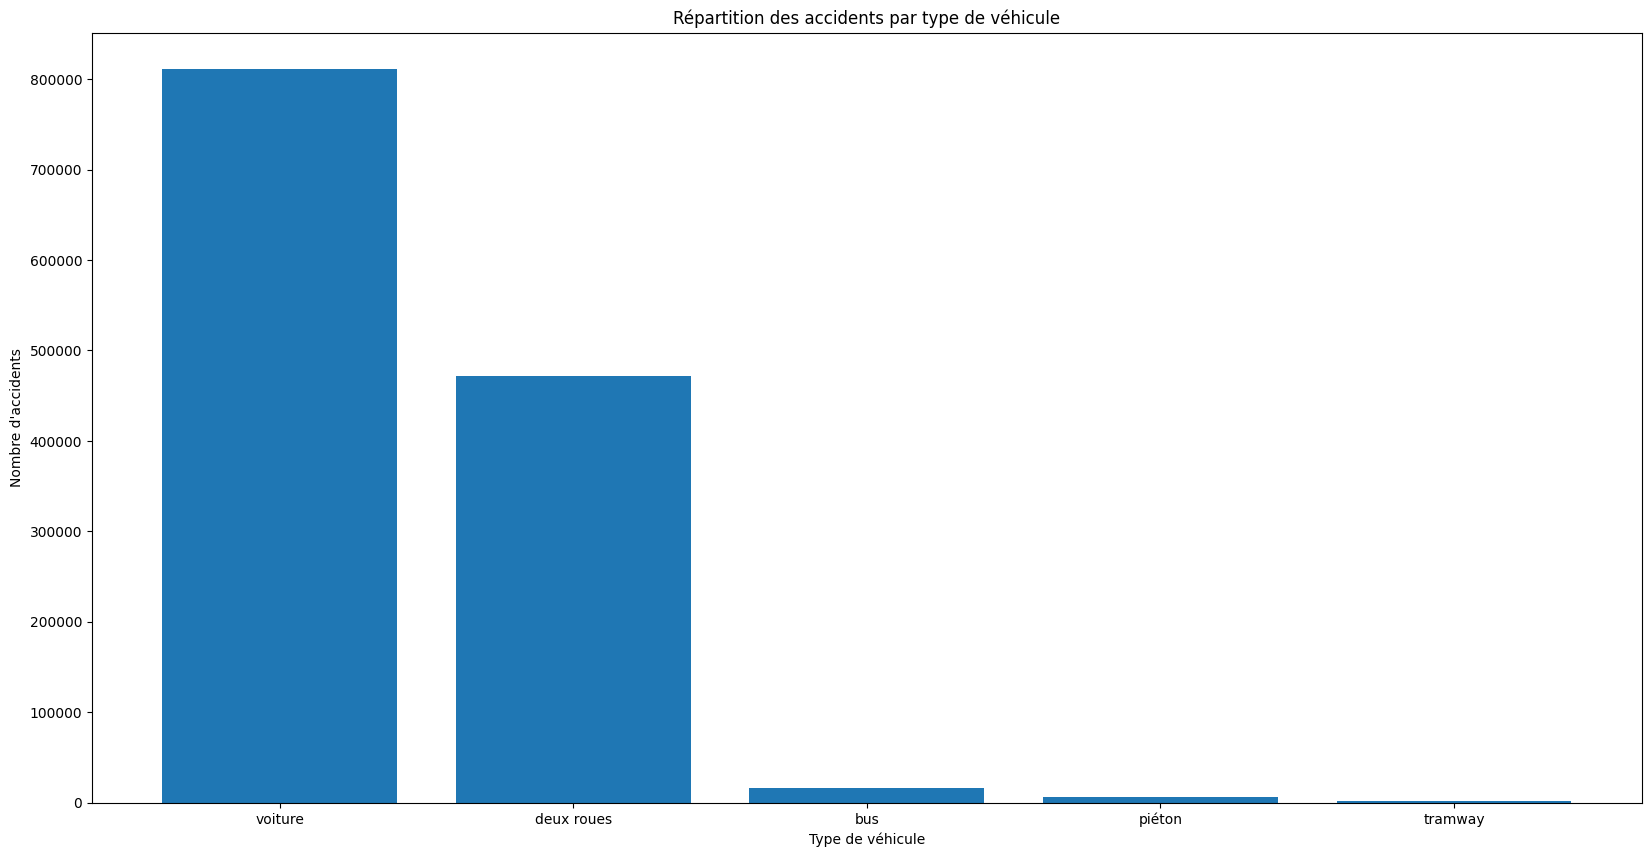

In [39]:
# accident
vehicules_rdd_dropdup = vehicules.dropDuplicates(["Num_Acc", "catv"]).drop().rdd

mappings = {1: "deux roues", 2: "deux roues", 4:"deux roues", 5:"deux roues", 6:"deux roues", 7: "voiture", 30:"deux roues", 31:"deux roues", 32:"deux roues", 33:"deux roues", 34:"deux roues", 18: "bus", 37: "bus", 38: "bus", 19:"tramway", 40:"tramway", 99: "piéton"}

# barplot du nombre d'accident par type de véhicule
k = vehicules_rdd_dropdup.filter(lambda x: x.catv != None).map(lambda x: (mappings.get(x.catv, "autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).filter(lambda x: x[0] != "autres").collect()

# barplot
labels = [x[0] for x in k]
sizes = [x[1] for x in k]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, sizes)
ax.set_title("Répartition des accidents par type de véhicule")
ax.set_xlabel("Type de véhicule")
ax.set_ylabel("Nombre d'accidents")
plt.show()


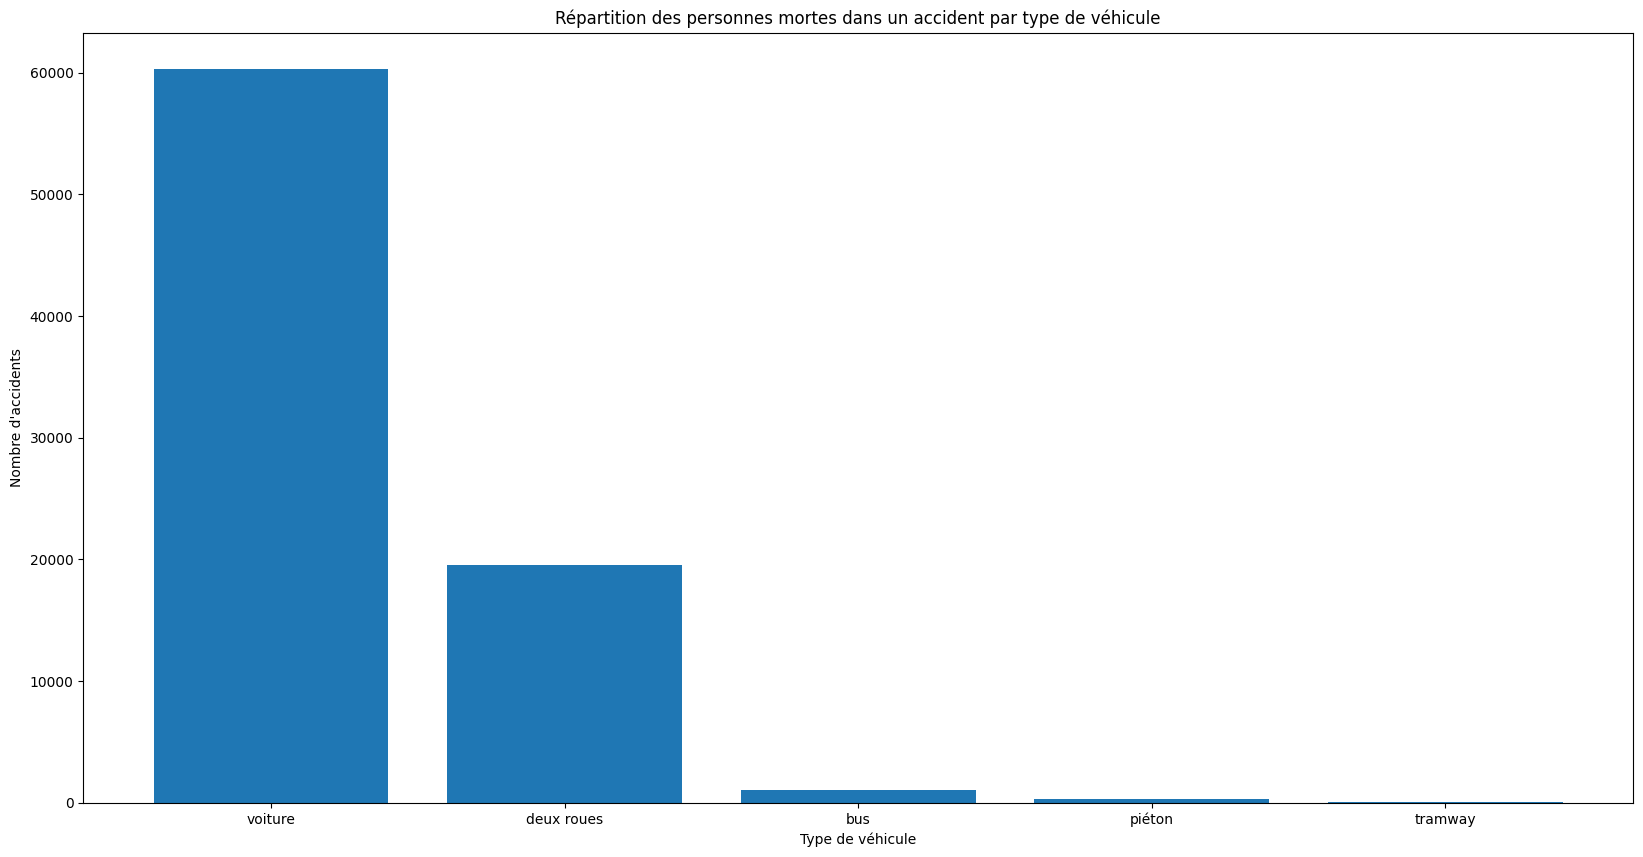

In [40]:
#piechar taux d'accident mortel par type de véhicule

usagers_dropna = usagers.dropna(subset=["grav"])

#filter the data to keep only the accident with a death
usagers_dropna = usagers_dropna.filter(usagers_dropna.grav == 2)

#join the data with the vehicules data to keep only the vehicule type
usagers_dropna = usagers_dropna.join(vehicules, usagers_dropna.Num_Acc == vehicules.Num_Acc, "inner")


mappings = {1: "deux roues", 2: "deux roues", 4:"deux roues", 5:"deux roues", 6:"deux roues", 7: "voiture", 30:"deux roues", 31:"deux roues", 32:"deux roues", 33:"deux roues", 34:"deux roues", 18: "bus", 37: "bus", 38: "bus", 19:"tramway", 40:"tramway", 99: "piéton"}

# transform to rdd and keep only the vehicule type
usagers_mort_typev = usagers_dropna.rdd.filter(lambda x: x.catv != None).map(lambda x: (mappings.get(x.catv, "autres"), 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).filter(lambda x: x[0] != "autres").collect()

# barplot
labels = [x[0] for x in usagers_mort_typev]
sizes = [x[1] for x in usagers_mort_typev]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, sizes)
ax.set_title("Répartition des personnes mortes dans un accident par type de véhicule")
ax.set_xlabel("Type de véhicule")
ax.set_ylabel("Nombre d'accidents")
plt.show()

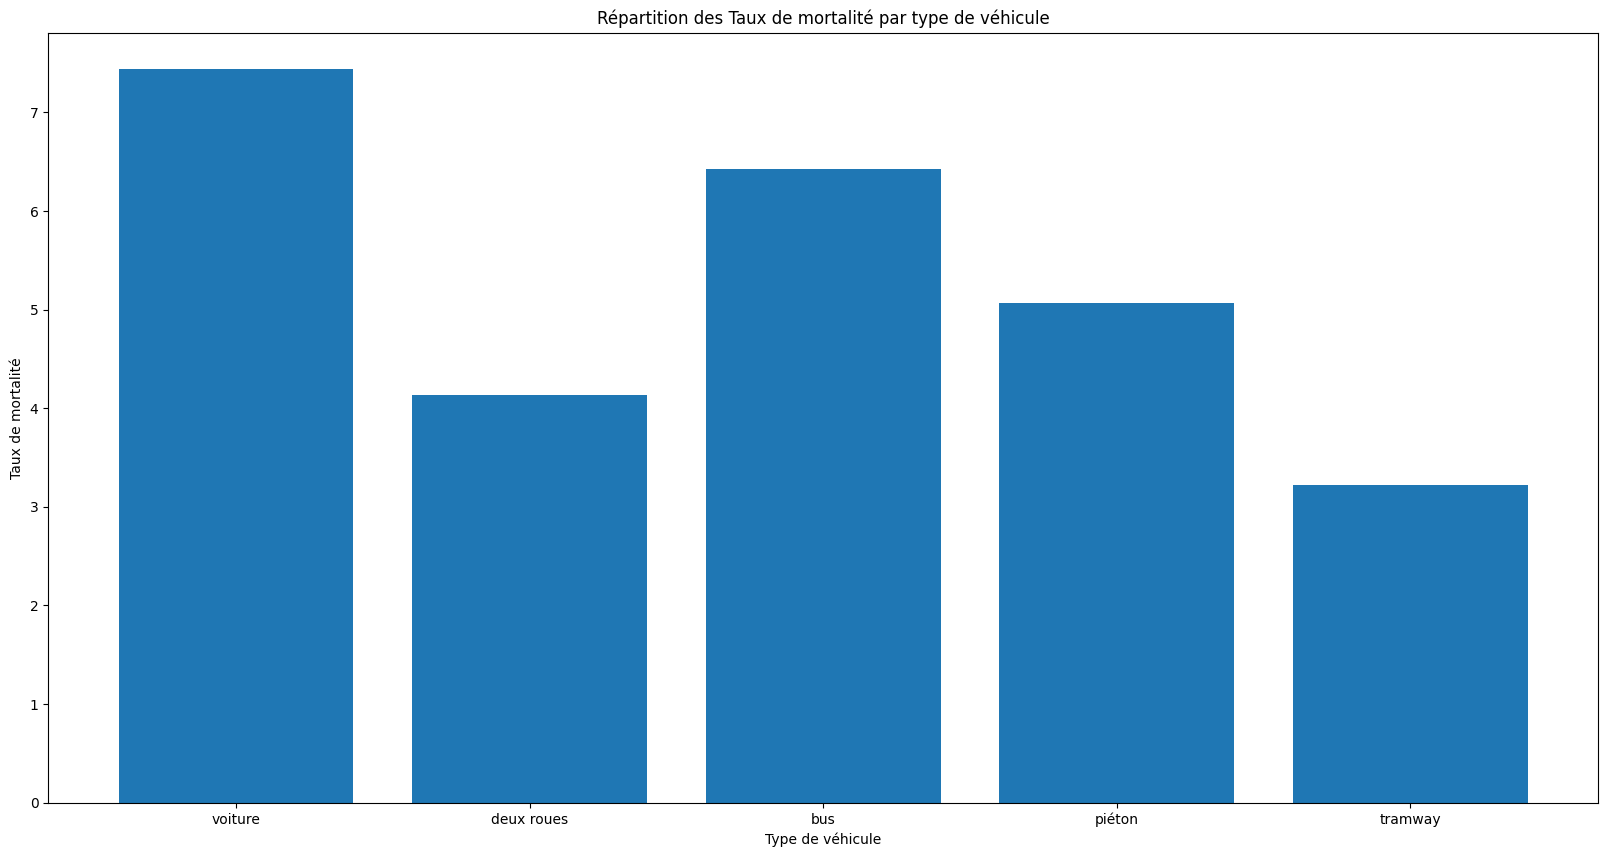

In [41]:
# normalisation des taux de mort suivant le nombre d'accident par type de véhicule
# barplot

# divide item in usagers_mort_typev by item in k
k2 = [(x[0], 100* (x[1]/y[1])) for x, y in zip(usagers_mort_typev, k)]
labels = [x[0] for x in k2]
sizes = [x[1] for x in k2]

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, sizes)
ax.set_title("Répartition des Taux de mortalité par type de véhicule")
ax.set_xlabel("Type de véhicule")
ax.set_ylabel("Taux de mortalité")
plt.show()




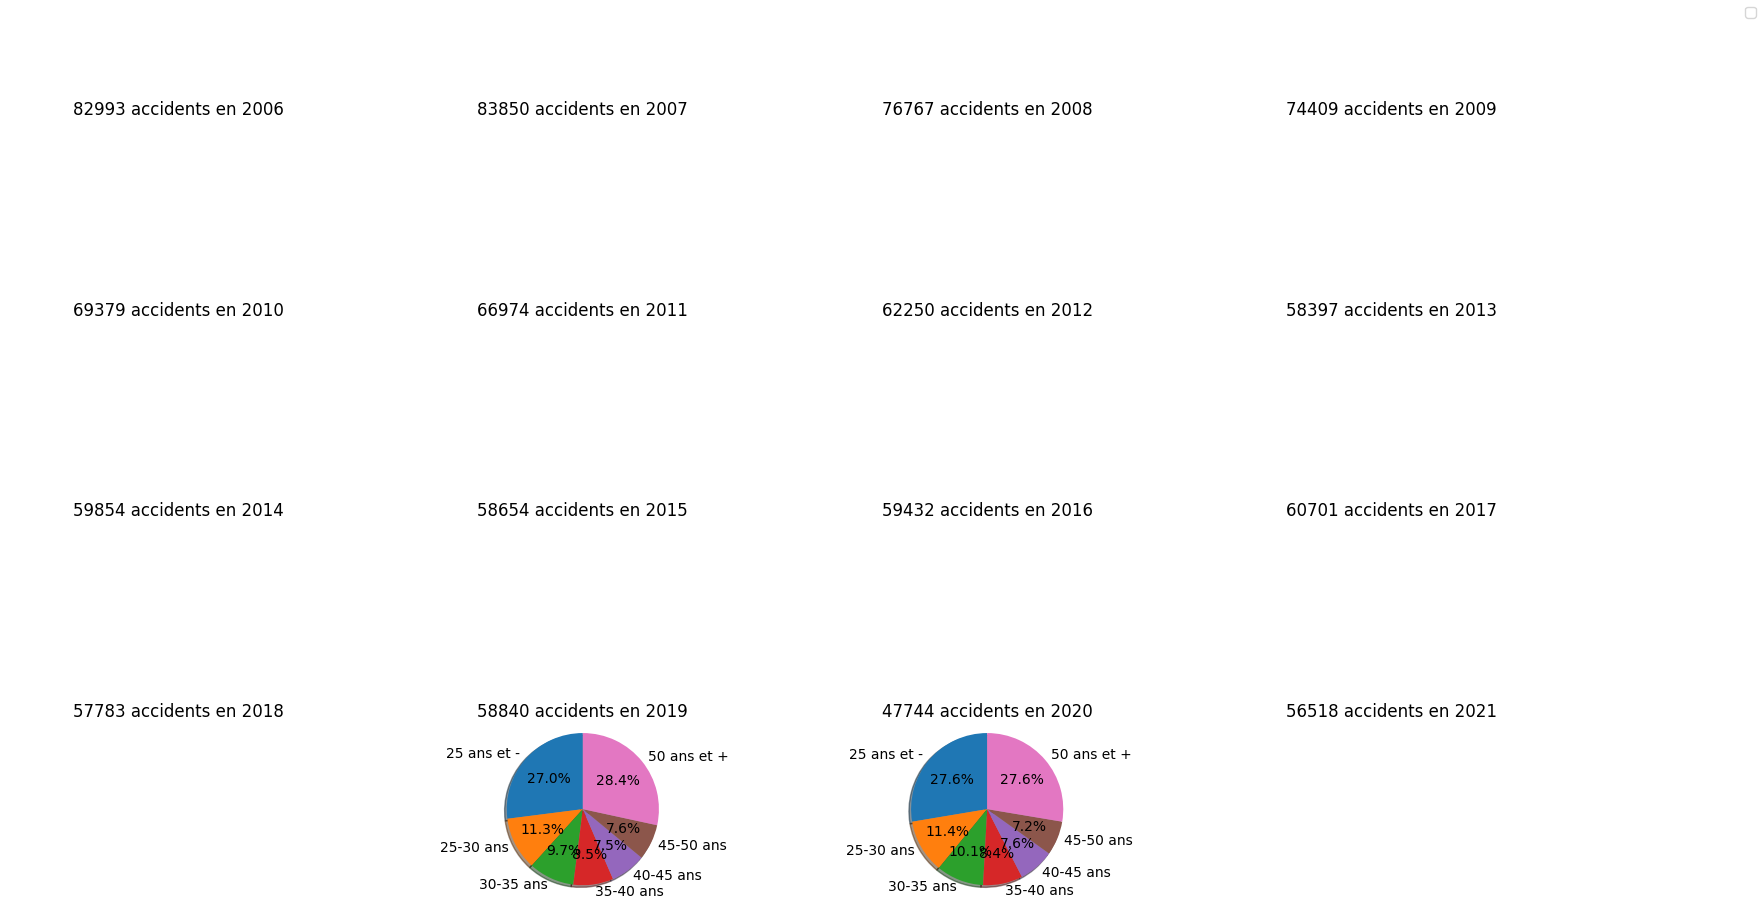

In [42]:
# graphique repartition des accidents par age pour chaque année
# create a subplot with 4 rows and 4 columns
fig, ax = plt.subplots(4, 4, figsize=(20, 10))

# plot le top3 des années de naissance des conducteurs par année dans un barplot
for i in range(6, 22):
    #acc_per_year = usagers_rdd.filter(lambda x: str(x.Num_Acc)[:4] == str(i+2000)).groupBy(lambda x: x.Num_Acc).distinct().count()
    acc_per_year = caracteristiques_rdd.filter(lambda x: x.an == i).count()

    k = usagers_rdd.filter(lambda x: x.an_nais != None).filter(lambda x: str(x.Num_Acc)[:4] == str(i+2000)).map(lambda x: (i+2000 - x.an_nais, 1)).map(lambda x: ("25 ans et -" if x[0] < 25 else "25-30 ans" if 25 <= x[0] < 30 else "30-35 ans" if 30 <= x[0] < 35 else '35-40 ans' if 35 <= x[0] < 40 else '40-45 ans' if 40 <= x[0] < 45 else '45-50 ans' if 45 <= x[0] < 50 else "50 ans et +", 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[0]).collect()

    labels = [x[0] for x in k]
    sizes = [x[1] for x in k]
    ax[int((i-6)/4)][(i-6)%4].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[int((i-6)/4)][(i-6)%4].axis('equal')
    ax[int((i-6)/4)][(i-6)%4].set_title(f"{acc_per_year} accidents en {i+2000}")

fig.legend(labels, loc="upper right")

